Epoch [1/15], Accu:79.6483 Loss: 0.6465
Epoch [2/15], Accu:90.8933 Loss: 0.3112
Epoch [3/15], Accu:92.5650 Loss: 0.2542
Epoch [4/15], Accu:93.5000 Loss: 0.2222
Epoch [5/15], Accu:93.9850 Loss: 0.2047
Epoch [6/15], Accu:94.4150 Loss: 0.1872
Epoch [7/15], Accu:94.7933 Loss: 0.1766
Epoch [8/15], Accu:95.1100 Loss: 0.1666
Epoch [9/15], Accu:95.1233 Loss: 0.1628
Epoch [10/15], Accu:95.5067 Loss: 0.1503
Epoch [11/15], Accu:95.5767 Loss: 0.1519
Epoch [12/15], Accu:95.7167 Loss: 0.1418
Epoch [13/15], Accu:95.7600 Loss: 0.1435
Epoch [14/15], Accu:95.9217 Loss: 0.1357
Epoch [15/15], Accu:96.0433 Loss: 0.1300


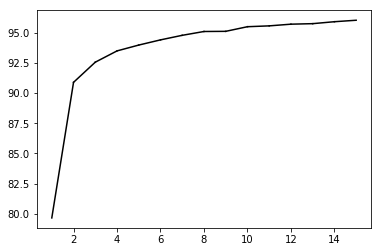

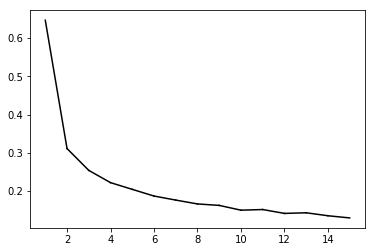

Accuracy of the network on the 10000 test images: 96 %


In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.001

# MNIST Dataset 
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Neural Network Model

# Model 1 Deep

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Model 2: Shallow
'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, kernel_size=5)
        self.conv1_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(432, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1_drop(self.conv1(x)), 2))
        x = x.view(-1, 432)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
'''

net = Net()


    
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  
#print(len(train_loader))


# Train the Model
for epoch in range(num_epochs):
    running_loss = 0.0
    running_correct = 0
    
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        #images = Variable(images.view(-1, 28*28))
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        _, pred = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        #loss & accuracy
        running_correct += torch.sum(pred == labels.data)
        running_loss += loss.data[0]
        
        optimizer.step()
        
    cur_accu = running_correct/len(train_loader)
    cur_loss = running_loss/len(train_loader)
    
    print ('Epoch [%d/%d], Accu:%.4f Loss: %.4f' % (epoch+1, num_epochs, cur_accu, cur_loss))

    if epoch != 0:
        plt.figure(1)
        plt.plot([epoch, epoch+1], [pre_accu, cur_accu], 'k')
        plt.figure(2)
        plt.plot([epoch, epoch+1], [pre_loss, cur_loss], 'k')

    pre_accu = cur_accu
    pre_loss = cur_loss
        
plt.show()
    
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    #images = Variable(images.view(-1, 28*28))
    images = Variable(images)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(net.state_dict(), 'model.pkl')